# Dataset & Prerequisites

Data that we use in this class is from PalmerPenguins Dataset. This dataset has been recently introduced as an alternative to the famous Iris dataset. It is created by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER. You can obtain this dataset here https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data. This dataset is essentially composed of two datasets, each containing data of 344 penguins. Just like in Iris dataset there are 3 different species of penguins coming from 3 islands in the Palmer Archipelago.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [19]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# 1. Imputation

* Data that we get from clients can come in all shapes and forms.
* Often it is sparse, meaning some samples may miss data for some features
*  we may apply different strategies for replacing those missing values. For example, we may fill these empty slots with average feature value, or maximal feature value

 let’s first detect missing data. For that we can use Pandas:

In [20]:
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


drop samples

The easiest deal with missing values is to drop samples with missing values from the dataset, 

In [21]:
data = data.dropna()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


The other way is to use imputation, meaning to replace missing values. To do so we can pick some value, or use the mean value of the feature, or an average value of the feature, 

In [22]:
data = data.fillna(0)

So, here is the proper way. We detected missing data in numerical features culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g. For the imputation value of these features, we will use the mean value of the feature. For the categorical feature ‘sex‘, we use the most frequent value. Here is how we do i

In [23]:
data = pd.read_csv('./data/penguins_size.csv')

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)

data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


Often, data is not missing, but it has an invalid value. For example, we know that for the ‘sex‘ feature we can have two values: FEMALE and MALE. We can check if we have values other than this:

In [24]:
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


As it turnes out we have one record that has value ‘.’ for this feature, which is not correct. We can observe these instances as a missing data and drop them or replace them:

In [25]:
data = data.drop([336])
data.reset_index()

,index,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...
338,339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
339,340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
340,341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
341,342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


# 2. Categorical Encoding

* One way to improve your predictions is by applying clever ways when working with categorical variables
* These variables, as the name suggests, have discrete values and represent some sort of category or class. For example color can be categorical variable (‘red’, ‘blue‘, ‘green‘). The challenge is including these variables into data analysis and use them with machine learning algorithms. Some machine learning algorithms support categorical variables without further manipulation, but some don’t. That is why we use a categorical encoding. In this tutorial, we cover several types of categorical encoding, 

let’s extract those variables from our dataset into a separate variable and mark them as categorical type:

In [26]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [27]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', \
			      'body_mass_g'], axis=1)
categorical_data.head()


,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


Ok, now we are ready to roll. We start with the simplest form of encoding Label Encoding.

### 2.1 Label Encoding

Label encoding is converting each categorical value into some number. For example, the ‘species‘ feature contains 3 categories. We can assign value 0 to Adelie, 1 to Gentoo and 2 to Chinstrap. 

In [28]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


, we added three new features each containing encoded categorical features. From the first five instances, we can see that species category Adelie is encoded with value 0, island category Torgensesn is encoded with value 2 and sex categories FEMALE and MALE are encoded with values 0 and 1 respectively.

### 2.2 One-Hot Encoding

It spreads the values in a feature to multiple flag features and assigns values 0 or 1 to them. This binary value represents the relationship between non-encoded and encoded features.

we have two possible values in ‘sex‘ feature: FEMALE and MALE. This technique will create two separate features labeled let’s say ‘sex_female‘ and ‘sex_male‘. If in the ‘sex‘ feature we have value ‘FEMALE‘ for some sample, the ‘sex_female‘ will be assigned value 1 and ‘sex_male‘ will be assigned value 0. In the same way, if in the ‘sex‘ feature we have the value ‘MALE‘ for some sample, the ‘sex_male‘ will be assigned value 1 and ‘sex_female‘ will be assigned value 0.

In [29]:
encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,2,1,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,MALE,0,2,1,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,FEMALE,0,2,0,1,0,0,0,0,1,1,0


As you we gave some new columns there. Essentially, every category in each feature got a separate column. Often, just one-hot encoded values are used as input to a machine learning algorithm.

### 2.3 Count Encoding

Count encoding is converting each categorical value to its frequency, ie. the number of times it appears in the dataset. For example, if the ‘species‘ feature contains 6 occurrences of class Adelie we will replace every Adelie value with the number 6. Here is how we do that in the code:

In [31]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'], axis=1)

species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

categorical_data.head()

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc
0,Adelie,Torgersen,MALE,152,52,178
1,Adelie,Torgersen,FEMALE,152,52,165
2,Adelie,Torgersen,FEMALE,152,52,165
3,Adelie,Torgersen,MALE,152,52,178
4,Adelie,Torgersen,FEMALE,152,52,165
...,...,...,...,...,...,...
339,Gentoo,Biscoe,MALE,123,167,178
340,Gentoo,Biscoe,FEMALE,123,167,165
341,Gentoo,Biscoe,MALE,123,167,178
342,Gentoo,Biscoe,FEMALE,123,167,165


### 2.4 Target Encoding

It replaces a categorical value with the average value of the output (ie. target) for that value of the feature. Essentially, all you need to do is calculate the average output for all the rows with specific category value. Now, this is quite straight forward when the output value is numerical. If the output is categorical, like in our PalmerPenguins dataset, we need to apply some of the previous techniques to it.

Often this average value is blended with the outcome probability over the entire dataset in order to reduce the variance of values with few occurrences.  It is important to note that since category values are calculated based on the output value, these calculations should be done on the training dataset and then applied to other datasets. Otherwise, we would face information leakage, meaning that we would include information about the output values from the test set inside of the training set. This would render our tests invalid or give us false confidence. Ok, let’s see how we can do this in code:

In [32]:
categorical_data["species"] = categorical_data["species"].cat.codes

island_means = categorical_data.groupby('island')['species'].mean()
sex_means = categorical_data.groupby('sex')['species'].mean()

Here we used label encoding for output feature and then calculated mean values for categorical features ‘island‘ and ‘sex‘. Here is what we get for the ‘island‘ feature:

In [33]:
island_means

island
Biscoe       1.473054
Dream        0.548387
Torgersen    0.000000
Name: species, dtype: float64

This means that values Biscoe, Dream and Torgersen will be replaced with values 1.473054, 0.548387 and 0 respectively. For the ‘sex‘ feature we have a similar situation:

In [34]:
sex_means

sex
FEMALE    0.909091
MALE      0.921348
Name: species, dtype: float64

Meaning that values FEMALE and MALE will be replaced with 0.909091 and 0.921348 respectively. Here is what that looks like in the dataset:

In [35]:
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc,island_target_enc,sex_target_enc
0,0,Torgersen,MALE,152,52,178,0.000000,0.921348
1,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
2,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
3,0,Torgersen,MALE,152,52,178,0.000000,0.921348
4,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091
...,...,...,...,...,...,...,...,...
339,2,Biscoe,MALE,123,167,178,1.473054,0.921348
340,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091
341,2,Biscoe,MALE,123,167,178,1.473054,0.921348
342,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091


### 2.5 Leave One Out Target Encoding

The final type of encoding that we explore in this tutorial is built on top of Target Encoding. It works in the same way as Target encoding with one difference. When we are calculating the mean output value for the sample, we exclude that sample. Here is how it is done in the code. First, we define a function that does this:

In [36]:
def leave_one_out_mean(series):
    series = (series.sum() - series)/(len(series) - 1)
    return series

In [37]:
# And then we apply it to categorical values in our dataset:
categorical_data['island_loo_enc'] = categorical_data.groupby('island')['species'].apply(leave_one_out_mean)
categorical_data['sex_loo_enc'] = categorical_data.groupby('sex')['species'].apply(leave_one_out_mean)
categorical_data.head()

,species,island,sex,species_count_enc,island_count_enc,sex_count_enc,island_target_enc,sex_target_enc,island_loo_enc,sex_loo_enc
0,0,Torgersen,MALE,152,52,178,0.000000,0.921348,0.00000,0.926554
1,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091,0.00000,0.914634
2,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091,0.00000,0.914634
3,0,Torgersen,MALE,152,52,178,0.000000,0.921348,0.00000,0.926554
4,0,Torgersen,FEMALE,152,52,165,0.000000,0.909091,0.00000,0.914634
...,...,...,...,...,...,...,...,...,...,...
339,2,Biscoe,MALE,123,167,178,1.473054,0.921348,1.46988,0.915254
340,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091,1.46988,0.902439
341,2,Biscoe,MALE,123,167,178,1.473054,0.921348,1.46988,0.915254
342,2,Biscoe,FEMALE,123,167,165,1.473054,0.909091,1.46988,0.902439


# 3. Handling Outliers

* Outliers are values that are deviating from the whole distribution of the data. 
* Sometimes these values are mistakes and wrong measurements and should be removed from datasets,
* Sometimes they are valuable edge-case information.
* This means that sometimes we want to leave these values in the dataset, since they may carry some important information, while other times we want to remove those samples, because of the wrong information.

* we can use the Inter-quartile range to detect these points. Inter-quartile range or IQR indicates where 50 percent of data is located.
* When we are looking for this value we first look for the median, since it splits data into half. 
* Then we are locating the median of the lower end of the data (denoted as Q1) and the median of the higher end of the data (denoted as Q3).
* Data between Q1 and Q3 is the IQR. 
* Outliers are defined as samples that fall below Q1 – 1.5(IQR) or above Q3 + 1.5(IQR). 


We can do this using a boxplot. The purpose of the boxplot is to visualize the distribution. In essence, it includes important points: max value, min value, median, and two IQR points (Q1, Q3). 

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

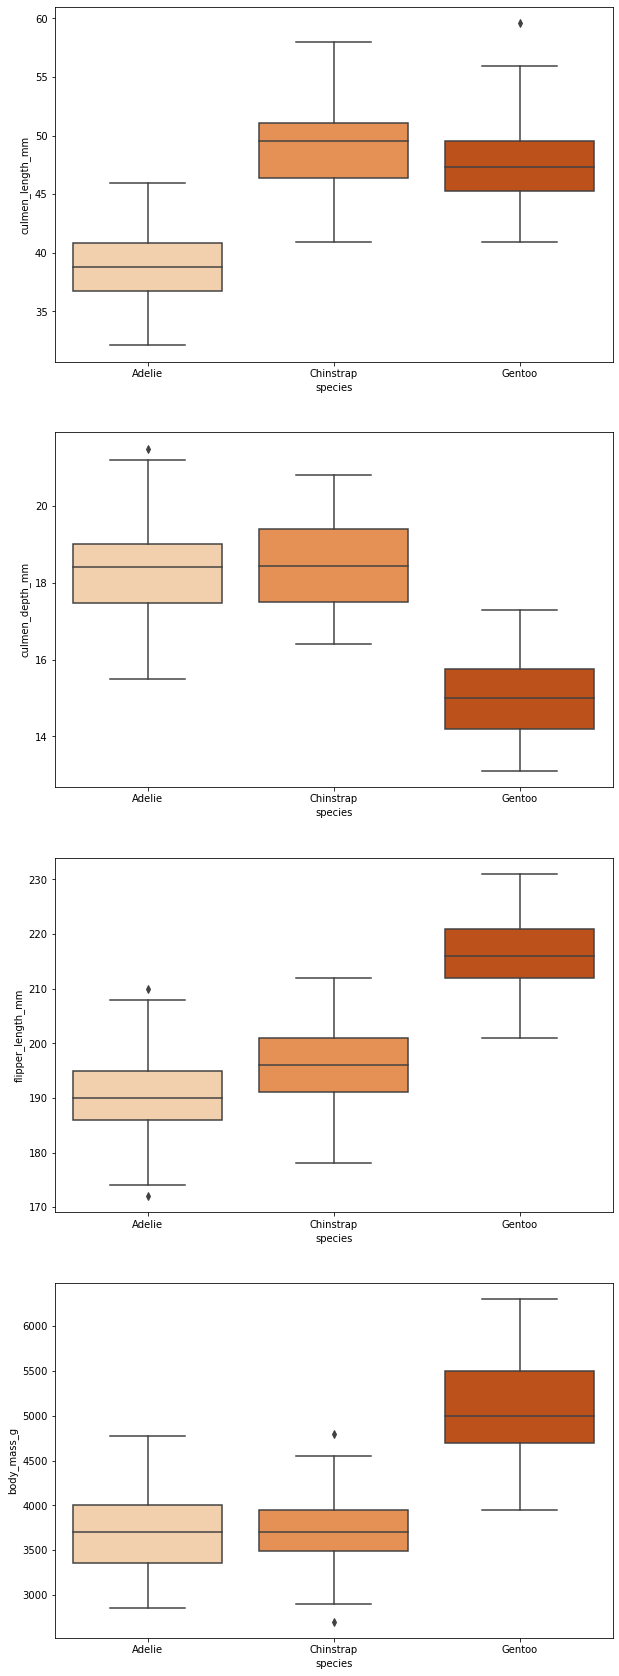

In [39]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

The other way for detecting and removing outliers would by using standard deviation

In [40]:
factor = 2
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


Note that now we have only 100 samples left after this operation. Here we need to define the factor by which we multiply the standard deviation. Usually, we use values between 2 and 4 for this purpose.

Finally, we can use a method to detect outliers is to use percentiles. 

We can assume a certain percentage of the value from the top or the bottom as an outlier. Again a value for the percentiles we use as outliers border depends on the distribution of the data. Here is what we can do on PalmerPenguins dataset:

In [42]:
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


After this operation, we have 305 samples in our dataset. With this approach we need to be extremely careful since it reduces the dataset size and highly depends on the data distribution.

# 4. Binning

Binning is a simple technique that groups different values into bins. For example, when we want to bin numerical features that would look like something like this:

* 0-10 – Low
* 10-50 – Medium
* 50-100 – High

However, we can bin categorical values too. For example, we can bin countries by the continent it is on:

The problem with binning is that it can downgrade performance, but it can prevent overfitting and increase the robustness of the machine learning model. Here is what that looks like in the code:

In [44]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100],
                                       labels=["Low", "Mid", "High"])
bin_data

<ipython-input-44-223d3c5b5438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100],


,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Mid
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,43.92193,Mid
340,46.80000,Mid
341,50.40000,High
342,45.20000,Mid


# 5. Scaling

*  machine learning models make better predictions. Scaling is done for one simple reason, if features are not in the same range, they will be treated differently by the machine learning algorithm. 

*  if we have one feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value.  if we have one feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value. 

* That is why we use scaling, to put our numerical features into the same range. This standardization of data is a common requirement for many machine learning algorithms

In [45]:
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


### 5.1 Standard Scaling

This type of scaling removes mean and scale data to unit variance
where mean is the mean of the training samples, and std is the standard deviation of the training samples. The best way to understand it is to look at it in practice. For that we use SciKit Learn and StandardScaler class:

In [46]:
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


<ipython-input-46-c8ef82bc70c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])


We can see that the original distribution of data is preserved. However, now data is in range -3 to 3.

### 5.2 Min-Max Scaling (Normalization)

The most popular scaling technique is normalization (also called min-max normalization and min-max scaling). It scales all data in the 0 to 1 range. This technique is defined by the formula:

In [47]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4166087696565679
Standard Deviation: 0.2222085746778217


<ipython-input-47-9b37f35d2138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])


Distribution is perserved, but data is now in range from 0 to 1.

### 5.3 Quantile Transformation

As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution

In [48]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.5002855778903038
Standard Deviation: 0.2899458384920982


C:\Users\John\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
<ipython-input-48-d3fac807fe8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


Here is the code that puts your data into normal distribution:

In [49]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

C:\Users\John\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (343). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
<ipython-input-49-9673b0d60ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])


Mean: 0.0011584329410665568
Standard Deviation: 1.0603614567765762


# 6. Log Transform 

* One of the most popular mathematical transformations of data is logarithm transformation. Essentially, we just apply the log function to the current values
*  It is important to note that data must be positive, so if you need a scale or normalize data beforehand. This transformation brings many benefits
*  One of them is that the distribution of the data becomes more normal. In turn, this helps us to handle skewed data and decreases the impact of the outliers. Here is what that looks like in the code:

In [50]:
log_data = data[['body_mass_g']]
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)
log_data

<ipython-input-50-a1689ef94c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)


,body_mass_g,body_mass_log
0,3750.000000,8.229778
1,3800.000000,8.243019
2,3250.000000,8.086718
3,4201.754386,8.343495
4,3450.000000,8.146419
...,...,...
339,4201.754386,8.343495
340,4850.000000,8.486940
341,5750.000000,8.657129
342,5200.000000,8.556606


If we check the distribution of non-transformed data and transformed data we can see that transformed data is closer to the normal distribution: